In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [420]:
ds = pd.read_csv("./data/ICD_original.csv")
md = pd.read_csv("./data/DRUG.csv")

In [421]:
mx = 0
ds_tt = {}
for key in ds.index:
    k = ds.loc[key, "ID"]
    ds.loc[key, "ID"] = list(ds.loc[key, "ID"].replace(".", ""))
    if ds.loc[key, "ID"][0].isalpha():
        ds.loc[key, "ID"][0] = ord(ds.loc[key, "ID"][0])
    ds.loc[key, "ID"] = [int(x) for x in ds.loc[key, "ID"]]
    while len(ds.loc[key, "ID"]) < 5:
        ds.loc[key, "ID"].append(0)
    if len(ds.loc[key, "ID"]) != 5:
        mx = len(ds.loc[key, "ID"])
    ds_tt[k] = ds.loc[key, "ID"]
#     print(ds.loc[key, "ID"])
print(mx)
# print(ds.loc[0, "ID"].size())

0


In [422]:
print(ds_tt)

{'001.0': [0, 0, 1, 0, 0], '001.1': [0, 0, 1, 1, 0], '001.9': [0, 0, 1, 9, 0], '002.0': [0, 0, 2, 0, 0], '002.1': [0, 0, 2, 1, 0], '002.2': [0, 0, 2, 2, 0], '002.3': [0, 0, 2, 3, 0], '002.9': [0, 0, 2, 9, 0], '003.0': [0, 0, 3, 0, 0], '003.1': [0, 0, 3, 1, 0], '003.20': [0, 0, 3, 2, 0], '003.21': [0, 0, 3, 2, 1], '003.22': [0, 0, 3, 2, 2], '003.23': [0, 0, 3, 2, 3], '003.24': [0, 0, 3, 2, 4], '003.29': [0, 0, 3, 2, 9], '003.8': [0, 0, 3, 8, 0], '003.9': [0, 0, 3, 9, 0], '004.0': [0, 0, 4, 0, 0], '004.1': [0, 0, 4, 1, 0], '004.2': [0, 0, 4, 2, 0], '004.3': [0, 0, 4, 3, 0], '004.8': [0, 0, 4, 8, 0], '004.9': [0, 0, 4, 9, 0], '005.0': [0, 0, 5, 0, 0], '005.1': [0, 0, 5, 1, 0], '005.2': [0, 0, 5, 2, 0], '005.3': [0, 0, 5, 3, 0], '005.4': [0, 0, 5, 4, 0], '005.81': [0, 0, 5, 8, 1], '005.89': [0, 0, 5, 8, 9], '005.9': [0, 0, 5, 9, 0], '006.0': [0, 0, 6, 0, 0], '006.1': [0, 0, 6, 1, 0], '006.2': [0, 0, 6, 2, 0], '006.3': [0, 0, 6, 3, 0], '006.4': [0, 0, 6, 4, 0], '006.5': [0, 0, 6, 5, 0], '00

In [38]:
ds_nm = pd.read_csv("./data/di_name_mat.csv")
print(ds_nm)

         id           name
0     729.2   神經痛、神經炎及神經根炎
1     952.9  無明顯脊柱骨損傷之脊髓傷害
2     523.3          急性牙周炎
3     708.9            蕁麻疹
4     372.3            結膜炎
..      ...            ...
265   478.1     鼻腔及鼻竇之其他疾病
266  372.14     其他慢性過敏性結膜炎
267   436.0   診斷欠明之急性腦血管疾病
268   274.9             痛風
269    V220           V220

[270 rows x 2 columns]


In [39]:
flg = 0
ds2vec = {}
for k in ds_nm.index:
    s = ds_nm.loc[k, "id"]
    idx = s.find('.')
    if idx != -1:
        s1 = list(s[:idx])
        if s1[0].isalpha():
            s1[0] = ord(s1[0]) / 10
        while len(s1) < 4:
            s1.insert(0, 0)
        s2 = list(s[idx+1:])
        while len(s2) < 2:
            s2.append(0)
        s = s1 + s2
    else:
        s = list(s)
        if s[0].isalpha():
            s[0] = ord(s[0]) / 10
        while len(s) < 6:
            s.append(0)
    s = [float(x) / 10 for x in s]
#     print(s)
    ds2vec[k] = s
    for ss in s:
        if ss > 1 or ss < 0:
            flg = 1
    if len(s) != 6:
        flg = 1
print(flg)
print(ds2vec)

0
{0: [0.0, 0.7, 0.2, 0.9, 0.2, 0.0], 1: [0.0, 0.9, 0.5, 0.2, 0.9, 0.0], 2: [0.0, 0.5, 0.2, 0.3, 0.3, 0.0], 3: [0.0, 0.7, 0.0, 0.8, 0.9, 0.0], 4: [0.0, 0.3, 0.7, 0.2, 0.3, 0.0], 5: [0.0, 0.4, 0.7, 0.3, 0.9, 0.0], 6: [0.0, 0.4, 0.6, 0.5, 0.9, 0.0], 7: [0.0, 0.4, 0.6, 0.1, 0.9, 0.0], 8: [0.0, 0.4, 0.6, 0.3, 0.0, 0.0], 9: [0.0, 0.9, 0.2, 0.4, 0.2, 0.0], 10: [0.0, 0.2, 0.9, 0.6, 0.9, 0.0], 11: [0.0, 0.7, 0.8, 0.4, 0.1, 0.0], 12: [0.0, 0.4, 0.7, 0.8, 0.9, 0.0], 13: [0.0, 0.1, 0.9, 0.3, 0.0, 0.0], 14: [0.0, 0.7, 0.1, 0.5, 0.2, 0.7], 15: [0.0, 0.7, 0.2, 0.6, 0.1, 0.0], 16: [0.0, 0.5, 0.2, 0.0, 0.9, 0.0], 17: [0.0, 0.7, 0.3, 0.3, 0.0, 0.0], 18: [0.0, 0.7, 0.8, 0.6, 0.2, 0.0], 19: [0.0, 0.2, 0.5, 0.0, 0.0, 0.0], 20: [0.0, 0.4, 0.8, 0.7, 0.1, 0.0], 21: [0.0, 0.2, 0.5, 0.0, 0.9, 0.0], 22: [0.0, 0.7, 0.1, 0.5, 0.9, 0.0], 23: [0.0, 0.7, 0.2, 0.4, 0.5, 0.0], 24: [0.0, 0.7, 0.2, 0.9, 0.1, 0.0], 25: [0.0, 0.4, 0.6, 0.0, 0.0, 0.0], 26: [0.0, 0.4, 0.6, 0.2, 0.0, 0.0], 27: [0.0, 0.5, 0.3, 0.6, 0.8, 0.0],

In [40]:
ds_trans = {}
ds_re = {}
for k in ds_nm.index:
    key = list(ds_nm.loc[k, "id"].replace(".", ""))
    if key[0].isalpha():
        key[0] = ord(key[0])
    key = [int(x) for x in key]
    while len(key) < 5:
        key.append(0)
    ds_trans[k] = key
#     ds_re[key] = k
print(ds_trans)

{0: [7, 2, 9, 2, 0], 1: [9, 5, 2, 9, 0], 2: [5, 2, 3, 3, 0], 3: [7, 0, 8, 9, 0], 4: [3, 7, 2, 3, 0], 5: [4, 7, 3, 9, 0], 6: [4, 6, 5, 9, 0], 7: [4, 6, 1, 9, 0], 8: [4, 6, 3, 0, 0], 9: [9, 2, 4, 2, 0], 10: [2, 9, 6, 9, 0], 11: [7, 8, 4, 1, 0], 12: [4, 7, 8, 9, 0], 13: [1, 9, 3, 0, 0], 14: [7, 1, 5, 2, 7], 15: [7, 2, 6, 1, 0], 16: [5, 2, 0, 9, 0], 17: [7, 3, 3, 0, 0], 18: [7, 8, 6, 2, 0], 19: [2, 5, 0, 0, 0], 20: [4, 8, 7, 1, 0], 21: [2, 5, 0, 9, 0], 22: [7, 1, 5, 9, 0], 23: [7, 2, 4, 5, 0], 24: [7, 2, 9, 1, 0], 25: [4, 6, 0, 0, 0], 26: [4, 6, 2, 0, 0], 27: [5, 3, 6, 8, 0], 28: [8, 9, 4, 0, 0], 29: [9, 1, 0, 0, 0], 30: [2, 9, 5, 1, 3], 31: [86, 4, 3, 1, 0], 32: [5, 8, 5, 0, 0], 33: [4, 6, 6, 0, 0], 34: [4, 3, 8, 9, 0], 35: [7, 8, 3, 4, 2], 36: [4, 6, 5, 0, 0], 37: [6, 4, 4, 0, 3], 38: [7, 2, 8, 8, 5], 39: [5, 7, 1, 2, 0], 40: [5, 3, 5, 0, 0], 41: [4, 6, 4, 0, 0], 42: [5, 3, 9, 0, 0], 43: [7, 2, 2, 1, 0], 44: [7, 0, 5, 8, 1], 45: [7, 2, 7, 0, 0], 46: [6, 9, 2, 9, 0], 47: [4, 0, 1, 1, 0], 

In [41]:
md_nm = pd.read_csv("./data/med_name_mat.csv")
print(md_nm)

        id        name
0        0      00114C
1        1         MA1
2        2  A016509100
3        3  A018559100
4        4  A032572100
...    ...         ...
4885  4885  A034111100
4886  4886  A041378100
4887  4887  A043771100
4888  4888  A001646100
4889  4889  AC57921100

[4890 rows x 2 columns]


In [42]:
flg = 0
cnt = 0
md2vec = {}
for k in md_nm.index:
    s = md_nm.loc[k, "name"]
    if s[-1] == '0':
        print(s)
        cnt += 1
print(cnt)

A016509100
A018559100
A032572100
AC29905100
AC304661G0
A031662100
A046184100
A044403100
AC482841G0
A004995100
A008774100
AC38329100
A005989100
A022470100
A034145100
A044801100
A0449771G0
A032500100
A036454100
A036360100
A040887100
A048630100
A015529100
A036600100
A043501100
A045000100
A010482100
A043695100
N009585100
A009255100
A022539100
A039059100
A041030100
A049699100
AC373441G0
B0071521G0
B020786100
B023109100
B023503100
B024391100
A039537100
B021571100
B022152100
A029828100
B023917100
B024480100
N0040851G0
A041488100
A042619100
AC142281G0
B020452100
B023711100
B024668100
A0058111G0
B023983100
AC361511G0
B013026100
B018279100
A012458100
A037697100
B022551100
B024131100
A010183100
B0201571G0
B0212341G0
B021780100
B0221431G0
A032373100
A049193100
A0058131G0
A030612100
A0150781G0
A023521100
A047656100
B004459100
A026526100
A033664100
A0395971G0
B022768100
N001580100
N005124100
A011012100
B025001100
AC228361G0
A0275311G0
B022159100
A028504100
A029034100
A0326191G0
B022889100
B022932100

In [43]:
md_trans = {}
for k in md_nm.index:
    key = list(str(k))
    key = [int(x) for x in key]
    while(len(key) < 4):
        key.insert(0, 0)
    md_trans[k] = key
print(md_trans)

{0: [0, 0, 0, 0], 1: [0, 0, 0, 1], 2: [0, 0, 0, 2], 3: [0, 0, 0, 3], 4: [0, 0, 0, 4], 5: [0, 0, 0, 5], 6: [0, 0, 0, 6], 7: [0, 0, 0, 7], 8: [0, 0, 0, 8], 9: [0, 0, 0, 9], 10: [0, 0, 1, 0], 11: [0, 0, 1, 1], 12: [0, 0, 1, 2], 13: [0, 0, 1, 3], 14: [0, 0, 1, 4], 15: [0, 0, 1, 5], 16: [0, 0, 1, 6], 17: [0, 0, 1, 7], 18: [0, 0, 1, 8], 19: [0, 0, 1, 9], 20: [0, 0, 2, 0], 21: [0, 0, 2, 1], 22: [0, 0, 2, 2], 23: [0, 0, 2, 3], 24: [0, 0, 2, 4], 25: [0, 0, 2, 5], 26: [0, 0, 2, 6], 27: [0, 0, 2, 7], 28: [0, 0, 2, 8], 29: [0, 0, 2, 9], 30: [0, 0, 3, 0], 31: [0, 0, 3, 1], 32: [0, 0, 3, 2], 33: [0, 0, 3, 3], 34: [0, 0, 3, 4], 35: [0, 0, 3, 5], 36: [0, 0, 3, 6], 37: [0, 0, 3, 7], 38: [0, 0, 3, 8], 39: [0, 0, 3, 9], 40: [0, 0, 4, 0], 41: [0, 0, 4, 1], 42: [0, 0, 4, 2], 43: [0, 0, 4, 3], 44: [0, 0, 4, 4], 45: [0, 0, 4, 5], 46: [0, 0, 4, 6], 47: [0, 0, 4, 7], 48: [0, 0, 4, 8], 49: [0, 0, 4, 9], 50: [0, 0, 5, 0], 51: [0, 0, 5, 1], 52: [0, 0, 5, 2], 53: [0, 0, 5, 3], 54: [0, 0, 5, 4], 55: [0, 0, 5, 5], 5

In [44]:
dg = pd.read_csv("./data/DRUG.csv")
print(dg)

       DRUG_MULTI          ID  PRICE  \
0               0  A000420100   0.00   
1               0  A000639100   0.00   
2               0  A0006391G0   0.00   
3               0  A000649100   0.00   
4               0  A001577100   0.00   
...           ...         ...    ...   
43447           0  AC59209100  16.90   
43448           0  AC59271100  16.90   
43449           0  AC60270100   8.40   
43450           0  B025427100   0.00   
43451           0  BC25427100  18.80   

                                                    NAME       USING  
0                      REIZER S.C. TABLETS 100 MG "F.Y."  AC00420100  
1                     TRYNOL S.C. TABLETS 25MG "JOHNSON"  AC00639100  
2      TRYNOL S.C. TABLETS 25MG "JOHNSON"(瓶裝/84粒/瓶) (...           0  
3                               TRYNOL S.C. TABLETS 10MG  AC00649100  
4                             TRIPYLINE TABLETS 25MG"HL"  AC01577100  
...                                                  ...         ...  
43447                 

In [45]:
miss = []
for k1 in md_nm.index:
    id = md_nm.loc[k1, "name"]
    fd = 0
    for k2 in dg.index:
        if id == dg.loc[k2, "ID"]:
            fd = 1
            break
    if fd != 1:
        miss.append(id)
# print(miss)

In [46]:
np.savetxt("./data/miss_med.csv", miss, delimiter =",",fmt ='% s')

In [47]:
dm = pd.read_csv("./data/dm_cnt_mat.csv")
print(dm)

      729.2  952.9  523.3  708.9  372.3  473.9  465.9  461.9  463.0  924.2  \
0       1.0    0.0    0.0   10.0    4.0    0.0   28.0   19.0    6.0    0.0   
1       5.0    0.0    0.0   73.0   21.0    0.0  135.0   26.0   29.0    0.0   
2       1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
4       1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4885    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4886    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4887    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4888    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4889    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  692.89  727.06  9.0  698.2  719.49  478.1  372.14  4

In [48]:
dm_pair = []
cnt = 0
for k in dm.index:
    for i in range(270):
        if dm.loc[k][i] > 5:
            cnt += 1
            dm_pair.append([k, i])
print(cnt)
print(dm_pair)

2500
[[0, 3], [0, 6], [0, 7], [0, 8], [0, 46], [1, 3], [1, 4], [1, 6], [1, 7], [1, 8], [1, 11], [1, 18], [1, 23], [1, 24], [1, 25], [1, 26], [1, 29], [1, 36], [1, 38], [1, 40], [1, 41], [1, 46], [1, 49], [1, 56], [1, 59], [1, 62], [1, 76], [1, 92], [1, 102], [1, 119], [1, 121], [1, 128], [1, 129], [1, 135], [1, 137], [1, 151], [1, 194], [1, 200], [1, 211], [1, 212], [1, 218], [1, 222], [1, 231], [1, 251], [1, 264], [5, 236], [7, 7], [7, 190], [8, 3], [8, 4], [8, 6], [8, 7], [8, 8], [8, 11], [8, 18], [8, 23], [8, 25], [8, 26], [8, 29], [8, 33], [8, 36], [8, 41], [8, 46], [8, 49], [8, 56], [8, 59], [8, 62], [8, 66], [8, 76], [8, 86], [8, 92], [8, 102], [8, 119], [8, 121], [8, 128], [8, 131], [8, 135], [8, 151], [8, 194], [8, 200], [8, 203], [8, 211], [8, 212], [8, 218], [8, 222], [8, 231], [8, 237], [8, 251], [8, 264], [9, 3], [9, 4], [9, 6], [9, 7], [9, 8], [9, 18], [9, 25], [9, 26], [9, 33], [9, 36], [9, 41], [9, 46], [9, 56], [9, 59], [9, 62], [9, 93], [9, 102], [9, 109], [9, 119], [9

In [49]:
dm_pair_input = []
for i in (dm_pair):
    pr = []
    pr.append(md_trans[i[0]])
    pr.append(ds_trans[i[1]])
    pr = [x for p in pr for x in p]
    dm_pair_input.append(pr)
print(dm_pair_input)

[[0, 0, 0, 0, 7, 0, 8, 9, 0], [0, 0, 0, 0, 4, 6, 5, 9, 0], [0, 0, 0, 0, 4, 6, 1, 9, 0], [0, 0, 0, 0, 4, 6, 3, 0, 0], [0, 0, 0, 0, 6, 9, 2, 9, 0], [0, 0, 0, 1, 7, 0, 8, 9, 0], [0, 0, 0, 1, 3, 7, 2, 3, 0], [0, 0, 0, 1, 4, 6, 5, 9, 0], [0, 0, 0, 1, 4, 6, 1, 9, 0], [0, 0, 0, 1, 4, 6, 3, 0, 0], [0, 0, 0, 1, 7, 8, 4, 1, 0], [0, 0, 0, 1, 7, 8, 6, 2, 0], [0, 0, 0, 1, 7, 2, 4, 5, 0], [0, 0, 0, 1, 7, 2, 9, 1, 0], [0, 0, 0, 1, 4, 6, 0, 0, 0], [0, 0, 0, 1, 4, 6, 2, 0, 0], [0, 0, 0, 1, 9, 1, 0, 0, 0], [0, 0, 0, 1, 4, 6, 5, 0, 0], [0, 0, 0, 1, 7, 2, 8, 8, 5], [0, 0, 0, 1, 5, 3, 5, 0, 0], [0, 0, 0, 1, 4, 6, 4, 0, 0], [0, 0, 0, 1, 6, 9, 2, 9, 0], [0, 0, 0, 1, 7, 8, 9, 0, 5], [0, 0, 0, 1, 7, 2, 4, 2, 0], [0, 0, 0, 1, 7, 0, 6, 1, 0], [0, 0, 0, 1, 7, 8, 0, 6, 0], [0, 0, 0, 1, 3, 6, 7, 9, 0], [0, 0, 0, 1, 1, 1, 0, 1, 0], [0, 0, 0, 1, 8, 8, 3, 0, 0], [0, 0, 0, 1, 7, 8, 1, 0, 0], [0, 0, 0, 1, 9, 2, 2, 1, 0], [0, 0, 0, 1, 7, 8, 4, 0, 0], [0, 0, 0, 1, 5, 6, 4, 0, 0], [0, 0, 0, 1, 3, 6, 8, 1, 3], [0, 0, 0, 1, 

In [50]:
from sklearn.model_selection import train_test_split

dm_pair_input = np.array(dm_pair_input)
print(dm_pair_input.shape)
x_train, x_test = train_test_split(dm_pair_input, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)

(2500, 9)
(1750, 9)
(750, 9)


In [51]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [57]:
latent_dim = 200

encoder_inputs = keras.Input(shape=(9, 1, 1))
x = layers.Conv2D(32, 2, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 2, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 9, 1, 1)]    0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 5, 1, 32)     160         ['input_3[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 3, 1, 64)     8256        ['conv2d_2[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 192)          0           ['conv2d_3[0][0]']               
                                                                                            

In [58]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(9 * 1 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((9, 1, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=1, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=1, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 2, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200)]             0         
                                                                 
 dense_3 (Dense)             (None, 576)               115776    
                                                                 
 reshape_1 (Reshape)         (None, 9, 1, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 9, 1, 64)         36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 9, 1, 32)         18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 9, 1, 1)          129 

In [59]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
    def inference(self, batch_size):
        for i in range(batch_size):
            z = tf.random.normal((1, latent_dim))
            reconstruction = vae.decoder.predict(z)

#             print(reconstruction)
#             print(type(reconstruction))
            re = []
            re.append(reconstruction)
        
        return re

In [60]:
train_set = np.concatenate([x_train, x_test], axis=0).astype("float32") / 100
print(train_set.shape)
train_set = np.expand_dims(train_set, -1)
train_set = np.expand_dims(train_set, -1)
print(train_set.shape)

(2500, 9)
(2500, 9, 1, 1)


In [61]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
history = vae.fit(train_set, epochs=30, batch_size=32)

Epoch 1/30
79/79 [==============================] - 1s 4ms/step - loss: 2.6976 - reconstruction_loss: 1.9113 - kl_loss: 0.0024
Epoch 2/30
79/79 [==============================] - 0s 3ms/step - loss: 1.4079 - reconstruction_loss: 1.3897 - kl_loss: 6.6443e-04
Epoch 3/30
79/79 [==============================] - 0s 3ms/step - loss: 1.3224 - reconstruction_loss: 1.3222 - kl_loss: 4.9575e-04
Epoch 4/30
79/79 [==============================] - 0s 3ms/step - loss: 1.3041 - reconstruction_loss: 1.3068 - kl_loss: 5.4393e-04
Epoch 5/30
79/79 [==============================] - 0s 3ms/step - loss: 1.2940 - reconstruction_loss: 1.2996 - kl_loss: 4.4432e-04
Epoch 6/30
79/79 [==============================] - 0s 3ms/step - loss: 1.3136 - reconstruction_loss: 1.3097 - kl_loss: 5.8349e-04
Epoch 7/30
79/79 [==============================] - 0s 3ms/step - loss: 1.3068 - reconstruction_loss: 1.3029 - kl_loss: 5.6683e-04
Epoch 8/30
79/79 [==============================] - 0s 4ms/step - loss: 1.3070 - recons

In [69]:
result = vae.evaluate(train_set)
dict(zip(vae.metrics_names, result))
print(result)
print(len(history.history['loss']))

NotImplementedError: in user code:

    File "/mnt/d/110Spring/Project/Model/VAE/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/mnt/d/110Spring/Project/Model/VAE/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/mnt/d/110Spring/Project/Model/VAE/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/mnt/d/110Spring/Project/Model/VAE/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "/mnt/d/110Spring/Project/Model/VAE/.venv/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/mnt/d/110Spring/Project/Model/VAE/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 517, in call
        raise NotImplementedError('Unimplemented `tf.keras.Model.call()`: if you '

    NotImplementedError: Exception encountered when calling layer "vae_1" (type VAE).
    
    Unimplemented `tf.keras.Model.call()`: if you intend to create a `Model` with the Functional API, please provide `inputs` and `outputs` arguments. Otherwise, subclass `Model` with an overridden `call()` method.
    
    Call arguments received by layer "vae_1" (type VAE):
      • inputs=tf.Tensor(shape=(None, 9, 1, 1), dtype=float32)
      • training=False
      • mask=None


In [405]:
recon = vae.inference(1)

1/1 [==============================] - 0s 78ms/step
[[[[0.00322244]]

  [[0.0233144 ]]

  [[0.05095739]]

  [[0.05756421]]

  [[0.11207938]]

  [[0.06457099]]

  [[0.03644164]]

  [[0.03895943]]

  [[0.00514497]]]]
<class 'numpy.ndarray'>


In [406]:
recon2 = np.array(recon)
print(type(recon2))
print(recon2.shape)
recon2 = np.array(np.squeeze(recon2))
print(recon2)

md_re = 100*recon2[:4]
ds_re = 100*recon2[4:10]
print(md_re, ds_re)

<class 'numpy.ndarray'>
(1, 1, 9, 1, 1)
[0.00322244 0.0233144  0.05095739 0.05756421 0.11207938 0.06457099
 0.03644164 0.03895943 0.00514497]
[0.32224447 2.3314402  5.095739   5.756421  ] [11.207938    6.4570994   3.6441636   3.895943    0.51449734]


In [407]:
def dist(table, v):
    mn, idx = float('inf'), 0
    for k in range(len(table)):
        dis = 0
        for i in range(len(table[k])):
            dis += (table[k][i] - v[i])**2        
        if dis < mn:
            mn = dis
            idx = k
    return mn, idx

In [408]:
md_dis, md_idx = dist(md_trans, md_re)
ds_dis, ds_idx = dist(ds_trans, ds_re)
print(md_dis, md_idx)
print(ds_dis, ds_idx)

0.28219072891588226 256
16.945663450749638 233


In [409]:
print(md_nm.loc[md_idx])
print(ds_nm.loc[ds_idx])

id         256
name    32017C
Name: 256, dtype: object
id             883.2
name    手指開放性傷口，傷及肌腱
Name: 233, dtype: object


79/79 [==============================] - 0s 1ms/step
[ 0.00030641 -0.0002556 ]


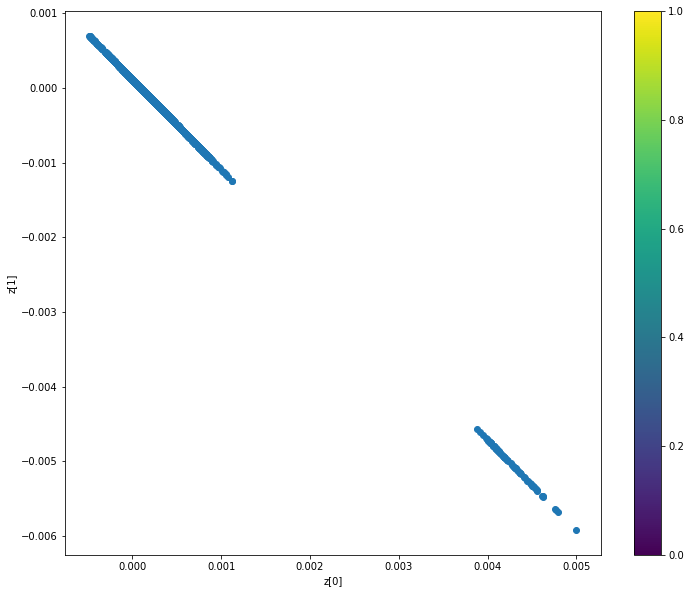

In [326]:
def plot_label_clusters(vae, data):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    print(z_mean[0])
    plt.scatter(z_mean[:, 0], z_mean[:, 1])
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(vae, train_set)    

In [476]:
reconstruction = []
ii = 0
while ii < 20:
    recon = vae.inference(ii+1)
    recon2 = np.array(recon)
    recon2 = np.array(np.squeeze(recon2))

    md_re = 100*recon2[:4]
    ds_re = 100*recon2[4:10]
    md_dis, md_idx = dist(md_trans, md_re)
    ds_dis, ds_idx = dist(ds_trans, ds_re)
       
    if (md_nm.loc[md_idx, "name"], ds_nm.loc[ds_idx, "name"]) not in reconstruction:
        ii += 1
        reconstruction.append((md_nm.loc[md_idx, "name"], ds_nm.loc[ds_idx, "name"]))

1/1 [==============================] - 0s 17ms/step


In [477]:
for i in reconstruction:
    print(i)

('B023178212', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('B024532100', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('32017C', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('A030740100', '胸痛')
('00181B', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('05214A', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('AC393041G0', '背痛')
('B023178212', '胸痛')
('A036049177', '頸臂徵候群(瀰漫性)')
('B015875212', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('B004459100', '牙齒磨損')
('32010C', 'unspecified缺乏正常之生理發育')
('A029951100', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('32010C', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('CLS04BS120SG', '其他胃炎,未提及出血')
('A049193100', 'obstruction急性喉氣管炎，未提及阻塞')
('A032373100', '急性牙周炎')
('A011012100', '手指開放性傷口，傷及肌腱')
('N004582238', '其他胃炎,未提及出血')
('32010C', '手指開放性傷口，傷及肌腱')


In [478]:
md_nm_trans = {}
for k in dg.index:
    md_nm_trans[dg.loc[k, "ID"]] = dg.loc[k, "NAME"]
print(md_nm_trans)

{'A000420100': 'REIZER S.C. TABLETS 100 MG "F.Y."', 'A000639100': 'TRYNOL S.C. TABLETS 25MG "JOHNSON"', 'A0006391G0': 'TRYNOL S.C. TABLETS 25MG "JOHNSON"(瓶裝/84粒/瓶) (鋁箔/膠箔)', 'A000649100': 'TRYNOL S.C. TABLETS 10MG', 'A001577100': 'TRIPYLINE TABLETS 25MG"HL"', 'A002558100': 'THIOZIN S.C. TABLETS 25MG', 'A003173100': 'FETIRIN S.C. TABLETS 10MG', 'A003174100': 'FETIRIN S.C. TABLETS 5MG', 'A003291100': 'PINSAUN TABLETS "YU SHENG"', 'A0032911G0': 'PINSAUN TABLETS "YU SHENG"(鋁箔/膠箔)', 'A003393100': 'CHLORPROMAZINE HCL S.C. TABLETS 100MG "VPP"', 'A004829100': 'ISETIN S.C. TABLETS "Y.S."', 'A004853209': 'TRILIZIN INJECTION "ASTAR"', 'A005090100': 'ZUCAIN TABLETS "CURIE"', 'A005344209': 'TUTANIN INJECTION "SINTON"', 'A006695100': 'MELLERIN S.C. TABLETS', 'A006819100': 'CHLORPROMAZINE HCL S.C. TABLETS 50MG "VPP"', 'A006822100': 'CHLORPROMAZINE HCL S.C. TABLETS 25MG "VPP"', 'A007544221': 'CHLORPROMAZINE HCL 125MG/5ML "VPP"', 'A008767100': 'LOXAPAC CAPSULES 10MG', 'A010195100': 'WINLERIL S.C. TABLE

In [483]:
re = pd.DataFrame(reconstruction, columns=["med", "dis"])
print(re)

             med                         dis
0     B023178212  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
1     B024532100  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
2         32017C  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
3     A030740100                          胸痛
4         00181B  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
5         05214A  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
6     AC393041G0                          背痛
7     B023178212                          胸痛
8     A036049177                  頸臂徵候群(瀰漫性)
9     B015875212  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
10    B004459100                        牙齒磨損
11        32010C        unspecified缺乏正常之生理發育
12    A029951100  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
13        32010C  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
14  CLS04BS120SG                  其他胃炎,未提及出血
15    A049193100     obstruction急性喉氣管炎，未提及阻塞
16    A032373100                       急性牙周炎
17    A011012100                手指開放性傷口，傷及肌腱
18    N004582238                  其他胃炎,未提及出血
19        32010C                手指開放性傷口，傷及肌腱


In [489]:
for k in re.index:
    if re.loc[k, "med"] in md_nm_trans.keys():
        re.loc[k, "med"] = md_nm_trans[re.loc[k, "med"]]
pd.set_option('display.width', 10000)
print(re)

                                                  med                         dis
0            PRIMPERAN 10MG/2ML INJECTABLE   SOLUTION  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
1                              TRANDATE TABLETS 200MG  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
2                                              32017C  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
3              RITALIN TABLETS 10MG (METHYLPHENIDATE)                          胸痛
4                                              00181B  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
5                                              05214A  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
6      ESTROMON F.C.TABLETS 0.625MG "STANDARD"(鋁箔/膠箔)                          背痛
7            PRIMPERAN 10MG/2ML INJECTABLE   SOLUTION                          胸痛
8       BABYATE ORAL ELECTROLYTE MAINTENANCE SOLUTION                  頸臂徵候群(瀰漫性)
9                                    TRAMAL INJECTION  損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態
10                              LEXOTAN TABLETS 1.5MG                        牙齒磨損
11              

In [446]:
for i in reconstruction:
    print(i)

('A049193100', '其他胃炎,未提及出血')
('32010C', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('B020144210', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('A030740100', '手指開放性傷口，傷及肌腱')
('05214A', 'unspecified缺乏正常之生理發育')
('CLS04BS120SG', '其他胃炎,未提及出血')
('A030740100', 'unspecified缺乏正常之生理發育')
('A036049177', '椎間盤移位，未伴有脊髓病變')
('05214A', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('32010C', '胸痛')
('B004459100', '急性牙周炎')
('A043991100', '胸痛')
('A036049177', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('A043991100', 'unspecified缺乏正常之生理發育')
('05205A', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('B023178212', '手指開放性傷口，傷及肌腱')
('B024532100', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')
('A019616329', '損傷後之硬腦膜下出血，未提及開放性顱內傷口與意識狀態')


In [447]:
print(len(reconstruction))

18
